## Maximum funded location


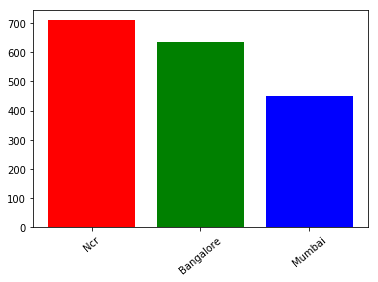

Ncr          709
Bangalore    635
Mumbai       449
Name: CityLocation, dtype: int64


In [42]:
# Open and read data file as specified in the question
# Print the required output in given format
# Open and read data file as specified in the question
# Print the required output in given format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def separateCity(city):
    c = city.split('/')[0].strip()
    return c

df_start = pd.read_csv("startup_funding.csv")
df_start['CityLocation'].dropna(inplace=True)
df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)
l = df_start['CityLocation'].value_counts()
l["New Delhi"]= l["New Delhi"] + l["Delhi"]
l.drop("Delhi",inplace=True)
l["Bangalore"]= l["Bangalore"] + l["bangalore"]
l["Ncr"] = l["New Delhi"] + l["Gurgaon"] + l["Noida"]
l.sort_values(inplace = True,ascending= False)
#print(l)
d = l.iloc[0:3]
plt.bar(d.index,d.values,color = ['Red','Green','blue','black','navy','navy'])
plt.xticks(rotation = 40)
plt.show()
print(d)



# Top Investors


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
Saif Partners 43
Indian Angel Network 41


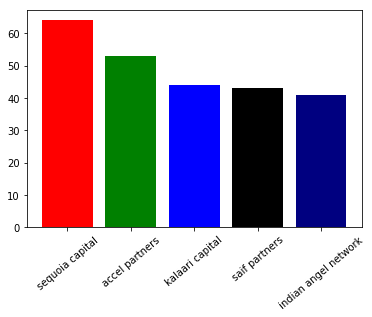

In [14]:
import pandas as pd
import operator
import numpy as np
data = pd.read_csv("startup_funding.csv")

def change(investor):
    investor = investor.split(",")
    investor = [x.strip() for x in investor]
    return investor
def tolower(investor):
    investor = [x.lower() for x in investor]
    return investor

data.dropna(subset=['InvestorsName'], inplace=True)
data["InvestorsName"] = data.InvestorsName.apply(change)
data["InvestorsName"] = data.InvestorsName.apply(tolower)
d = {}
for i in data.InvestorsName:
    for j in i:
        if j != 'undisclosed investors':
            if j in d:
                d[j] = d[j]+1
            else:
                d[j] = 1
d = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
d = dict(d[0:5])
names = d.keys()
values = d.values()
for i in names:
    n = ''.join(x for x in i.title())
    print(n,d[i])
    
plt.bar(d.keys(),d.values(),color = ['Red','Green','blue','black','navy','blue'])
plt.xticks(rotation = 40)
plt.show()
    

#  Q 3. modification of 2 count multiple investment of a investor in a startup as one


Sequoia Capital 48
Accel Partners 47
Indian Angel Network 41
Kalaari Capital 41
Blume Ventures 36


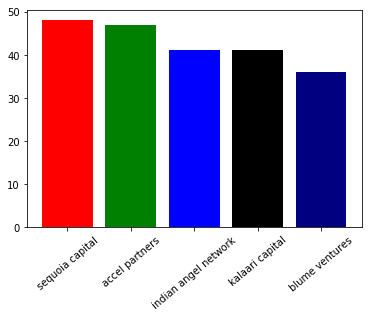

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def changename(name):
    name = name.lower()
    return name

def change(investor):
    investor = investor.split(",")
    investor = [x.strip() for x in investor]
    #investor = list(set(investor))
    return investor

def unique(investor):
    investor = np.unique(investor)
    return investor

def merge(investor):
    l = []
    for i in investor:
        l += i
    return l
    
def tolower(investor):
    investor = [x.lower() for x in investor]
    return investor

data = pd.read_csv("startup_funding.csv")

data["StartupName"].dropna(inplace = True)
data.dropna(subset=['InvestorsName'], inplace=True)

def correctStartup(x,y,Exception):
    if(x in Exception):
        return x
    for i in y:
        if(i.lower()==x.lower().strip()or x.lower().strip().startswith(i.lower())):
            return i
    return x
StartupCorrection=['Ola','Oyo','Flipkart','Paytm']
Exception=['OYOfit']
data.StartupName=data.StartupName.apply(correctStartup,args=[StartupCorrection,Exception])


data["InvestorsName"] = data.InvestorsName.apply(change)    
data["InvestorsName"] = data.InvestorsName.apply(tolower)   #Investors name to lower case
df = data["InvestorsName"].groupby(data.StartupName)
df = df.apply(merge)   #merge all the resultant lists
df = df.apply(unique)   #take occurence of investor for each startup once 
d = {}
for i in df:
    for j in i:
        if (j != 'undisclosed investors') & (j!= ''):
            if j in d:
                d[j] = d[j]+1
            else:
                d[j] = 1

d = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
d = dict(d[0:5])
names = d.keys()
values = d.values()
for i in names:
    n = ''.join(x for x in i.title())
    print(n,d[i])
    
plt.bar(d.keys(),d.values(),color = ['Red','Green','blue','black','navy','blue'])
plt.xticks(rotation = 40)
plt.show()

#  Q 4. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. 

Indian Angel Network 34
Rajan Anandan 23
Group Of Angel Investors 19
Letsventure 16
Anupam Mittal 16


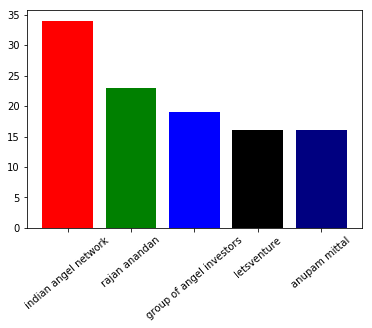

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def changename(name):
    name = name.lower()
    return name

def change(investor):
    investor = investor.split(",")
    investor = [x.strip() for x in investor]
    return investor

def unique(investor):
    investor = np.unique(investor)
    return investor

def merge(investor):
    l = []
    for i in investor:
        l += i
    return l
def tolower(investor):
    investor = [x.lower() for x in investor]
    return investor

data = pd.read_csv("startup_funding.csv")
data["StartupName"].dropna(inplace = True)
data.dropna(subset=['InvestorsName'], inplace=True)

data["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
data["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
data["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

data = data[(data.InvestmentType == "Seed Funding") | (data.InvestmentType == "Crowd Funding")]

def correctStartup(x,y,Exception):
    if(x in Exception):
        return x
    for i in y:
        if(i.lower()==x.lower().strip()or x.lower().strip().startswith(i.lower())):
            return i
    return x
StartupCorrection=['Ola','Oyo','Flipkart','Paytm']
Exception=['OYOfit']
data.StartupName=data.StartupName.apply(correctStartup,args=[StartupCorrection,Exception])



data["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
data["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
data["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
data["InvestorsName"] = data.InvestorsName.apply(change)
data["InvestorsName"] = data.InvestorsName.apply(tolower)

df = data["InvestorsName"].groupby(data.StartupName).apply(unique)
df = df.apply(merge)
df = df.apply(unique)
d = {}
for i in df:
    for j in i:
        if (j != 'undisclosed investor') & (j != 'undisclosed investors'):
            if j!= '':
                if j in d:
                    d[j] = d[j]+1
                else:
                    d[j] = 1
d = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
d = dict(d[0:5])
names = d.keys()
values = d.values()
for i in names:
    n = ''.join(x for x in i.title())
    print(n,d[i])
plt.bar(d.keys(),d.values(),color = ['Red','Green','blue','black','navy','navy'])
plt.xticks(rotation = 40)
plt.show()

# Q 5. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. 

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
Saif Partners 26


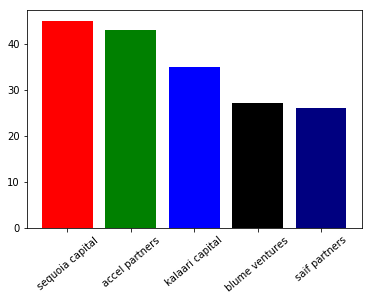

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def changename(name):
    name = name.lower()
    return name

def change(investor):
    investor = investor.split(",")
    investor = [x.strip() for x in investor]
    return investor

def unique(investor):
    investor = np.unique(investor)
    return investor

def merge(investor):
    l = []
    for i in investor:
        l += i
    return l
def tolower(investor):
    investor = [x.lower() for x in investor]
    return investor

data = pd.read_csv("startup_funding.csv")

data["StartupName"].dropna(inplace = True)
data.dropna(subset=['InvestorsName'], inplace=True)

data["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
data["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
data["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

data = data[data.InvestmentType == "Private Equity"]

def correctStartup(x,y,Exception):
    if(x in Exception):
        return x
    for i in y:
        if(i.lower()==x.lower().strip()or x.lower().strip().startswith(i.lower())):
            return i
    return x
StartupCorrection=['Ola','Oyo','Flipkart','Paytm']
Exception=['OYOfit']
data.StartupName=data.StartupName.apply(correctStartup,args=[StartupCorrection,Exception])


data["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
data["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
data["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

data["InvestorsName"] = data.InvestorsName.apply(change)
data["InvestorsName"] = data.InvestorsName.apply(tolower)

df = data["InvestorsName"].groupby(data.StartupName).apply(unique)
df = df.apply(merge)
df = df.apply(unique)
d = {}

for i in df:
    for j in i:
        if (j != 'undisclosed investor') & (j != 'undisclosed investors'):
            if j!= '':
                if j in d:
                    d[j] = d[j]+1
                else:
                    d[j] = 1

d = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
d = dict(d[0:5])
names = d.keys()
values = d.values()
for i in names:
    n = ''.join(x for x in i.title())
    print(n,d[i])
plt.bar(d.keys(),d.values(),color = ['Red','Green','blue','black','navy','blue'])
plt.xticks(rotation = 40)
plt.show()